##### Naive persistance model

In [1]:
# prediction value for current time is the previous value

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts_ud\Resources\Data + Code\daily-min-temperatures.csv', parse_dates=[0])

In [5]:
df.head(2)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9


In [6]:
df['pred_t'] = df['Temp'].shift(1)

df.head()

,Date,Temp,pred_t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [8]:
df.shape[0]

3650

In [9]:
df.shape[0]-7

3643

In [10]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [11]:
train

,Date,Temp,pred_t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [12]:
test

,Date,Temp,pred_t
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [14]:
x_train, y_train = train['pred_t'], train['Temp']
x_test, y_test = test['pred_t'], test['Temp']

In [15]:
x_train

1       20.7
2       17.9
3       18.8
4       14.6
5       15.8
        ... 
3638    14.7
3639    15.4
3640    13.1
3641    13.2
3642    13.9
Name: pred_t, Length: 3642, dtype: float64

In [17]:
x_test

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: pred_t, dtype: float64

In [18]:
y_train

1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64

In [19]:
y_test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [21]:
# walk-forward validation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test)
mse

3.4228571428571413

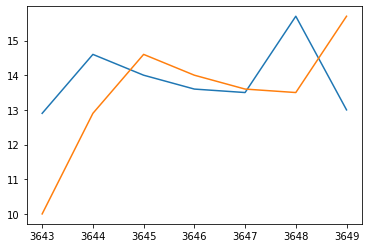

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(y_test)
plt.plot(x_test)